# Network Analysis with Python, Pandas, and NetworkX

Adapted from https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [1]:
import networkx as nx
#!pip install decorator==5.0.9

## Creating a Graph

In [42]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty
G



In [45]:
# Add a node
G.add_node(1) 

# You can also add a list of nodes by passing a list argument
G.add_nodes_from([2,3,4,5,6])




In [46]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [49]:
# Add edges 
G.add_edge(1,2)
G.add_edge(2,2)
G.add_edge(3,4)
G.add_edge(2,3)
G.add_edge(3,5)
G.add_edge(2,6)
G.add_edge(1,6)
G.add_edge(4,6)


In [48]:
e = (2,3)
G.add_edge(*e) # * unpacks the tuple
G.add_edges_from([(1,2), (1,3)]) # Just like nodes we can add edges from a list

__In addition to constructing graphs node-by-node or edge-by-edge, they can also be generated by applying classic graph operations, such as:__

* subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
* union(G1,G2)             - graph union
* disjoint_union(G1,G2)    - graph union assuming all nodes are different
* cartesian_product(G1,G2) - return Cartesian product graph
* compose(G1,G2)           - combine graphs identifying nodes common to both
* complement(G)            - graph complement
* create_empty_copy(G)     - return an empty copy of the same graph class
* convert_to_undirected(G) - return an undirected representation of G
* convert_to_directed(G)   - return a directed representation of G

## Accessing edges and nodes

In [50]:
#Nodes and Edges can be accessed together using the G.nodes() and G.edges() methods. 
# Individual nodes and edges can be accessed using the bracket/subscript notation.

G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [51]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 6), (2, 2), (2, 3), (2, 6), (3, 4), (3, 5), (4, 6)])

In [52]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}, 6: {}})

In [53]:
G[1][2]

{}

In [54]:
G.edges[1, 2]

{}

## Graph Visualization

* Networkx provides basic functionality for visualizing graphs, but its main goal is to enable graph analysis rather than perform graph visualization. 
* Matplotlib offers some convenience functions. 
* GraphViz is probably the best tool for us as it offers a Python interface in the form of PyGraphViz.

In [12]:
#!pip install decorator==5.0.9

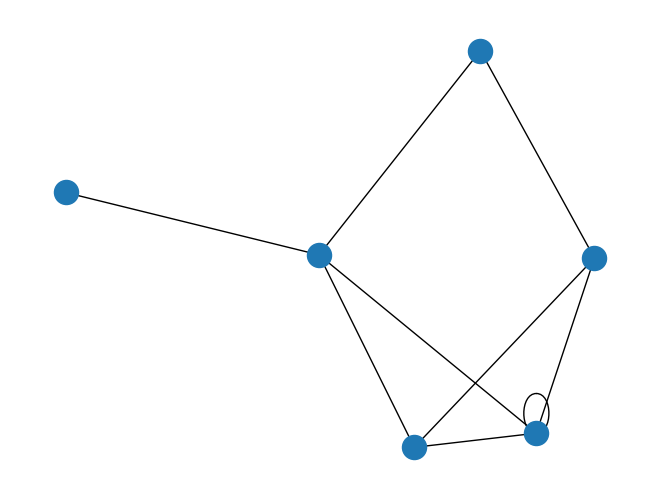

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

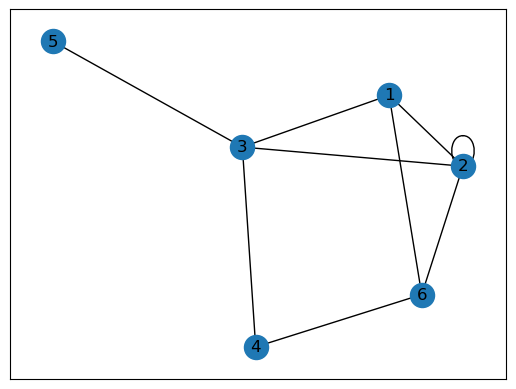

In [56]:
nx.draw_networkx(G)

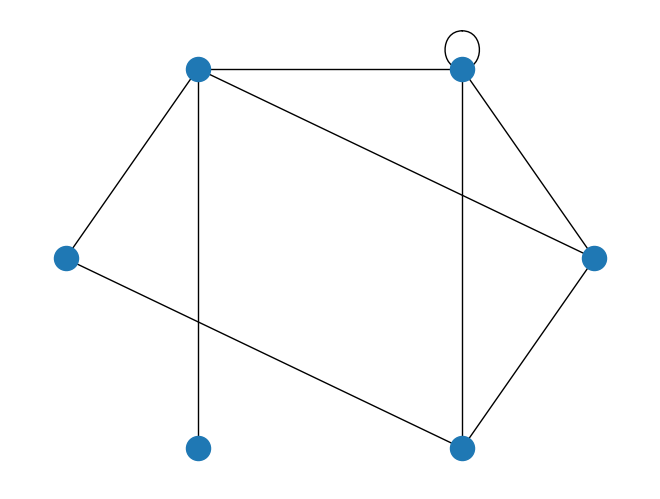

In [57]:
nx.draw_circular(G)

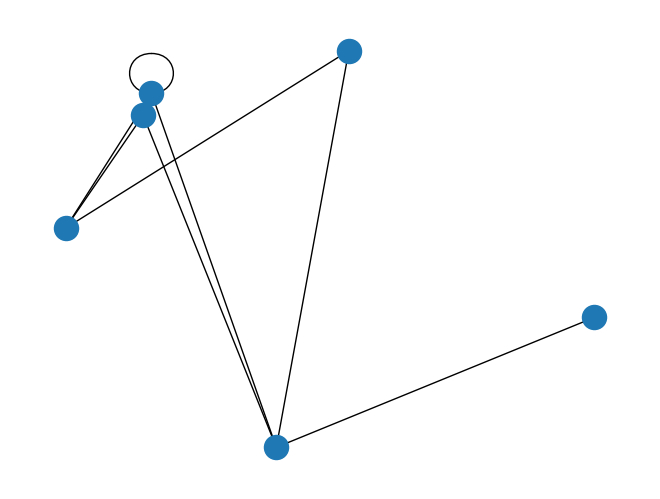

In [58]:
nx.draw_random(G)

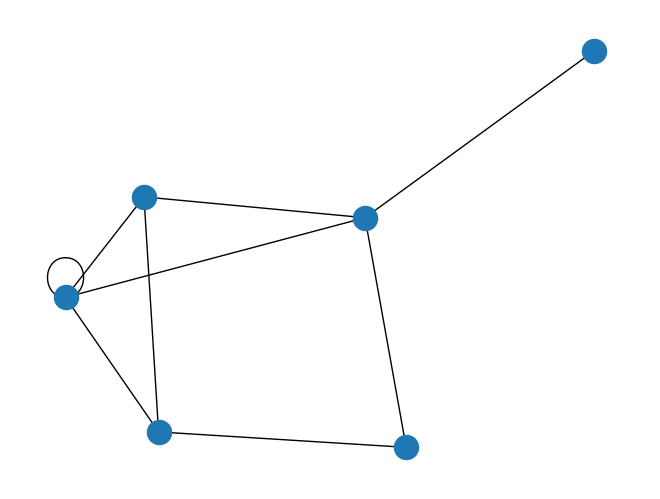

In [59]:
nx.draw_spring(G)

## Network analysis with a dataset 

* The dataset we will be looking at comes from the Airlines Industry. 
* It has some basic information on the Airline routes. 
* There is a Source of a flight and a destination. 
* There are also a few columns indicating arrival and departure times for each flight.

__The questions we would like to answer__

* What is the shortest way to get from A to B? In terms of distance and in terms of time
* Is there a way to go from C to D?
* Which airports have the heaviest traffic?
* Which airport in “in between” most other airports? (Can it be converted into a local hub)?

In [60]:
import pandas as pd 
import numpy as np

df = pd.read_csv('flights.csv')


In [26]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2/26/13
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,8/17/13
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2/13/13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,4/11/13
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,8/5/13


* Origin and destination look like good choices for Nodes. 
* Everything can become either node or edge attributes. 
* A single edge is a flight with the following attributes:
    * Various times
    * Flight number
    * An airplane tail number
    * Etc...

In [61]:
flight_graph = nx.from_pandas_edgelist(df, 
                                       source='origin', 
                                       target='dest', 
                                       edge_attr=True,)


In [63]:
len(list(df['origin'].unique()) + list(df['dest'].unique()))


36

In [64]:
flight_graph.nodes()

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [65]:
flight_graph.edges() 

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

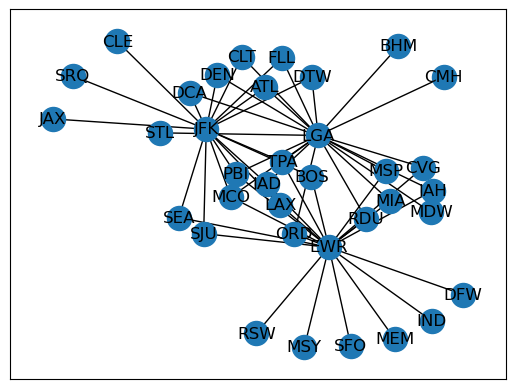

In [66]:
nx.draw_networkx(flight_graph, with_labels=True)

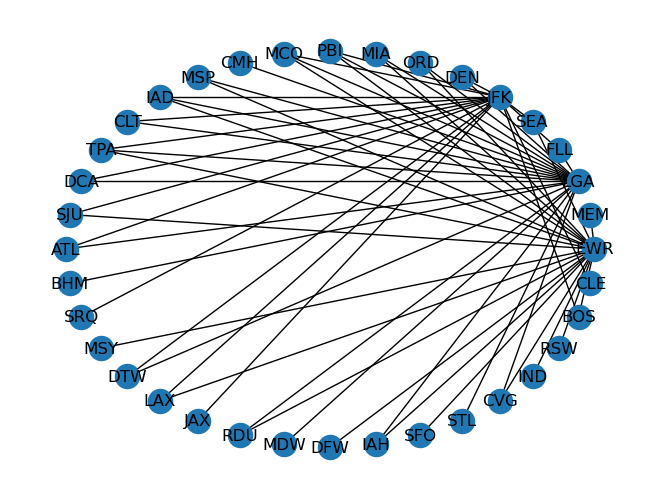

In [67]:
nx.draw_circular(flight_graph, with_labels=True)

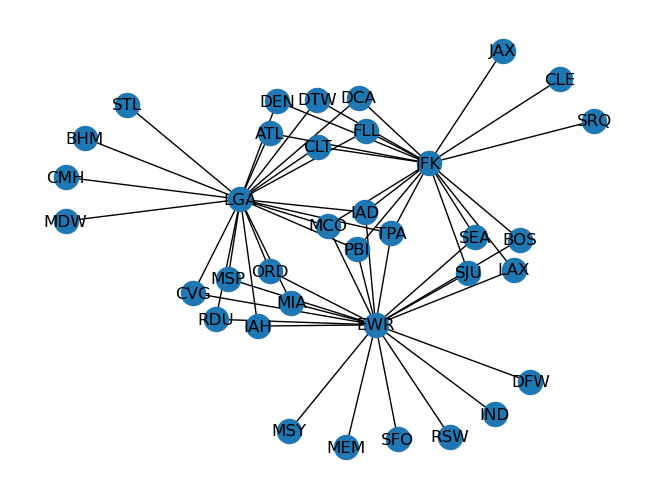

In [68]:
nx.draw_spring(flight_graph, with_labels=True)

### Closeness Centrality

* Closeness centrality is a way of detecting nodes that are able to spread information very efficiently through a graph.
* The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. Nodes with a high closeness score have the shortest distances to all other nodes.
* For each node u, the Closeness Centrality algorithm calculates the sum of its distances to all other nodes, based on calculating the shortest paths between all pairs of nodes. 
    * The resulting sum is then inverted to determine the closeness centrality score for that node.

In [70]:
cc = nx.algorithms.closeness_centrality(flight_graph) 
{k: v for k, v in sorted(cc.items(), key=lambda item: item[1])}

{'SRQ': 0.33980582524271846,
 'JAX': 0.33980582524271846,
 'CLE': 0.33980582524271846,
 'MEM': 0.36082474226804123,
 'CMH': 0.36082474226804123,
 'BHM': 0.36082474226804123,
 'MSY': 0.36082474226804123,
 'MDW': 0.36082474226804123,
 'DFW': 0.36082474226804123,
 'SFO': 0.36082474226804123,
 'STL': 0.36082474226804123,
 'IND': 0.36082474226804123,
 'RSW': 0.36082474226804123,
 'FLL': 0.43209876543209874,
 'DEN': 0.43209876543209874,
 'CLT': 0.43209876543209874,
 'DCA': 0.43209876543209874,
 'ATL': 0.43209876543209874,
 'DTW': 0.43209876543209874,
 'SEA': 0.45454545454545453,
 'SJU': 0.45454545454545453,
 'LAX': 0.45454545454545453,
 'BOS': 0.45454545454545453,
 'ORD': 0.4666666666666667,
 'MIA': 0.4666666666666667,
 'MSP': 0.4666666666666667,
 'RDU': 0.4666666666666667,
 'IAH': 0.4666666666666667,
 'CVG': 0.4666666666666667,
 'JFK': 0.5072463768115942,
 'PBI': 0.5223880597014925,
 'MCO': 0.5223880597014925,
 'IAD': 0.5223880597014925,
 'TPA': 0.5223880597014925,
 'EWR': 0.555555555555555

### Degree Centrality

* The Degree Centrality algorithm can be used to find popular nodes within a graph. 
* Degree centrality measures the number of incoming or outgoing (or both) relationships from a node, depending on the orientation of a relationship projection. 
* It can be applied to either weighted or unweighted graphs. 
* In the weighted case the algorithm computes the sum of all positive weights of adjacent relationships of a node, for each node in the graph. Non-positive weights are ignored.

In [71]:
dc = nx.algorithms.degree_centrality(flight_graph) 
{k: v for k, v in sorted(dc.items(), key=lambda item: item[1])}

{'MEM': 0.02857142857142857,
 'CMH': 0.02857142857142857,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'JAX': 0.02857142857142857,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'CLE': 0.02857142857142857,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'MSP': 0.05714285714285714,
 'CLT': 0.05714285714285714,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'RDU': 0.05714285714285714,
 'IAH': 0.05714285714285714,
 'CVG': 0.05714285714285714,
 'BOS': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'IAD': 0.08571428571428572,
 'TPA': 0.08571428571428572,
 'JFK': 0.4857142857142857,
 'EWR': 0.57142

### Betweenness Centrality

* Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another.
* The algorithm calculates shortest paths between all pairs of nodes in a graph. Each node receives a score, based on the number of shortest paths that pass through the node. Nodes that more frequently lie on shortest paths between other nodes will have higher betweenness centrality scores.

In [72]:
dc = nx.algorithms.betweenness_centrality(flight_graph) 
{k: v for k, v in sorted(dc.items(), key=lambda item: item[1])}

{'MEM': 0.0,
 'CMH': 0.0,
 'BHM': 0.0,
 'SRQ': 0.0,
 'MSY': 0.0,
 'JAX': 0.0,
 'MDW': 0.0,
 'DFW': 0.0,
 'SFO': 0.0,
 'STL': 0.0,
 'IND': 0.0,
 'RSW': 0.0,
 'CLE': 0.0,
 'FLL': 0.007282913165266107,
 'DEN': 0.007282913165266107,
 'CLT': 0.007282913165266107,
 'DCA': 0.007282913165266107,
 'ATL': 0.007282913165266107,
 'DTW': 0.007282913165266107,
 'ORD': 0.011484593837535018,
 'MIA': 0.011484593837535018,
 'MSP': 0.011484593837535018,
 'RDU': 0.011484593837535018,
 'IAH': 0.011484593837535018,
 'CVG': 0.011484593837535018,
 'SEA': 0.01204481792717087,
 'SJU': 0.01204481792717087,
 'LAX': 0.01204481792717087,
 'BOS': 0.01204481792717087,
 'PBI': 0.030812324929971994,
 'MCO': 0.030812324929971994,
 'IAD': 0.030812324929971994,
 'TPA': 0.030812324929971994,
 'JFK': 0.30952380952380965,
 'LGA': 0.40952380952380946,
 'EWR': 0.44733893557422966}

In [35]:
# Average edge density of the Graphs
nx.density(flight_graph) 

0.09047619047619047

In [36]:
# Average shortest path length for ALL paths in the Graph
nx.average_shortest_path_length(flight_graph) 

2.36984126984127

* Calculate the shortest path algorithm by weighing the paths with either the distance or airtime. 
* Note that this is an approximate solution – the actual problem to solve is to calculate the shortest path factoring in the availability of a flight when you reach your transfer airport + wait time for the transfer. 
* For the purposes of this exercise we will just assume that is flight is readily available when you reach an airport and calculate the shortest path using the airtime as the weight

In [37]:
# Find all the paths available
for path in nx.all_simple_paths(flight_graph, source='JAX', target='DFW'):
    print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [73]:
# Dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from: 
# https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(flight_graph, source='JAX', target='DFW')
dijpath


['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [74]:
# Find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(flight_graph, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

In [40]:
# Find the dijkstra path weighted by distance
shortpath = nx.dijkstra_path(flight_graph, source='JAX', target='DFW', weight='distance')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']

## Bibliography and references:

This tutorial is largely based on an article titled "An Introduction to Graph Theory and Network Analysis" (https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/) 

* History of Graph Theory || S.G. Shrinivas et. al: http://www.cs.xu.edu/csci390/12s/IJEST10-02-09-124.pdf
* Networkx reference documentation: https://networkx.github.io/documentation/stable/reference/index.html
* Graphviz download: http://www.graphviz.org/download/
* Pygraphvix: http://pygraphviz.github.io/
* Star visualization: https://github.com/pygraphviz/pygraphviz/blob/master/examples/star.py
* Dijkstra Algorithm: https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm